# Calcular pelo arquivo da arvore de decisão gerado

In [ ]:
# !pip install flask joblib tensorflow

In [ ]:
# !pip install pyngrok
# from pyngrok import ngrok

# # Expor a API publicamente
# public_url = ngrok.connect(5000)
# print(f"API disponível em: {public_url}")

In [ ]:
# !pip install flask_ngrok

In [ ]:
!ngrok authtoken 2YuCr9kjTWjciYJ2VlMRESwOTnI_3poZajDsLQVgut2h51Ukx

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
# from flask import Flask, request, jsonify
# from flask_ngrok import run_with_ngrok
# import numpy as np
# import joblib

# # Inicializar o aplicativo Flask
# app = Flask(__name__)
# run_with_ngrok(app)

# # Carregar o modelo de árvore de decisão
# modelo_arvore_decisao = joblib.load('modelo_arvore_decisao.pkl')

# @app.route('/prever', methods=['POST'])
# def prever():
#     # Obter os dados da requisição
#     dados = request.get_json()

#     # Certificar-se de que os dados são uma lista e convertê-los para uma matriz NumPy
#     dados_array = np.array(list(dados.values())).reshape(1, -1)

#     # Fazer a previsão usando o modelo de árvore de decisão
#     resultado_arvore_decisao = modelo_arvore_decisao.predict(dados_array)

#     # Converter o resultado para um formato adequado para resposta
#     resultado_dict = {'resultado': int(resultado_arvore_decisao[0])}

#     return jsonify(resultado_dict)



In [ ]:
# # Rodar o aplicativo
# if __name__ == '__main__':
#     app.run()


# Calcular pelo código do professor

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [ ]:
seed = 5
np.random.seed(seed)

pd.set_option('display.max_columns', 25)

df = pd.read_csv('dataframeN.csv')
#visualizando
print('>>>>> Visualizando os Dados <<<<<\n')
print(df.shape)

df.head()

>>>>> Visualizando os Dados <<<<<

(11118, 13)


,Nº_envolvido,condutor,cod_severidade,desc_severidade,sexo,cinto_seguranca,Embreagues,Idade,categoria_habilitacao,especie_veiculo,pedestre,passageiro,turno
0,1,1,1,0,1,0,0,35,4,0,0,0,0
1,2,1,3,1,2,1,1,42,0,1,0,0,0
2,3,0,3,1,1,1,0,32,0,1,0,1,0
3,1,0,1,0,2,1,0,72,0,2,0,1,0
4,2,1,3,1,1,1,0,55,0,2,0,0,0


In [ ]:
def normalize(dados):
    result = dados.copy()
    for feature_name in dados.columns:
        max_value = dados[feature_name].max()
        min_value = dados[feature_name].min()
        result[feature_name] = (dados[feature_name] - min_value) / (max_value - min_value)
    return result

#dados normalizados
print('>>>>> Dataset(df) normalizado: \n')
dfnorm = normalize(df)
dfnorm.head()

>>>>> Dataset(df) normalizado: 



,Nº_envolvido,condutor,cod_severidade,desc_severidade,sexo,cinto_seguranca,Embreagues,Idade,categoria_habilitacao,especie_veiculo,pedestre,passageiro,turno
0,0.000000,1.0,0.333333,0.000000,0.5,0.0,0.0,0.384615,0.333333,0.00,0.0,0.0,0.0
1,0.058824,1.0,1.000000,0.333333,1.0,1.0,0.5,0.461538,0.000000,0.05,0.0,0.0,0.0
2,0.117647,0.0,1.000000,0.333333,0.5,1.0,0.0,0.351648,0.000000,0.05,0.0,0.5,0.0
3,0.000000,0.0,0.333333,0.000000,1.0,1.0,0.0,0.791209,0.000000,0.10,0.0,0.5,0.0
4,0.058824,1.0,1.000000,0.333333,0.5,1.0,0.0,0.604396,0.000000,0.10,0.0,0.0,0.0


In [ ]:
df2 = df.astype('int')

from sklearn.model_selection import train_test_split
y = df2['desc_severidade'] #target
X = df2.drop(columns = ['desc_severidade'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 25)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

plt.show()

                 Parametros
feature                    
cod_severidade        0.780
especie_veiculo       0.078
condutor              0.036
passageiro            0.022
Idade                 0.020


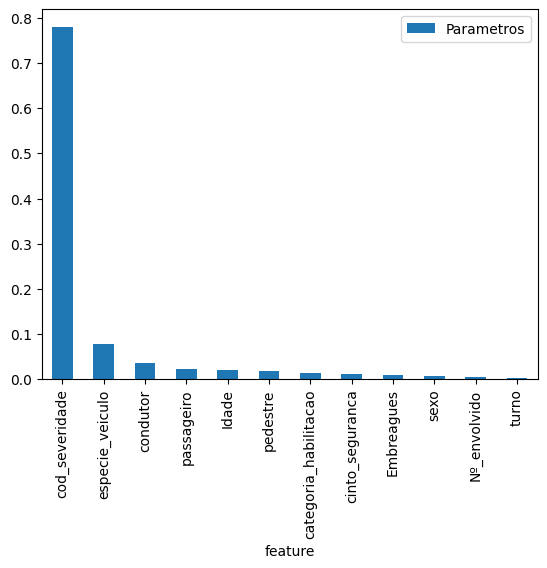

In [ ]:
parametros = pd.DataFrame({'feature':X_train.columns,'Parametros':np.round(random_forest.feature_importances_,3)})
parametros = parametros.sort_values('Parametros',ascending=False).set_index('feature')
print(parametros.head())

parametros.plot.bar()
plt.show()

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

#SelectFromModel realiza a seleção automática dos recursos
#n_estimators corresponde ao número de árvores utilizadas
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(X_train, y_train)
print('Recursos Selecionados: ', sel.get_support())

#get_support é o método que indice os rescursos selecionados
selected_feat= X_train.columns[(sel.get_support())]
print('Qte de recursos selecionados: ', len(selected_feat))
print('Nome dos recursos selecionados: ', selected_feat)

Recursos Selecionados:  [False False  True False False False False False False False False False]
Qte de recursos selecionados:  1
Nome dos recursos selecionados:  Index(['cod_severidade'], dtype='object')


In [ ]:
# Fazer previsões no conjunto de teste
y_pred = random_forest.predict(X_test)

# Avaliação do modelo
from sklearn.metrics import accuracy_score

# Calcular a acurácia
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia: {accuracy * 100:.4f}%')

Acurácia: 100.0000%


In [ ]:
!pip install pyngrok
from pyngrok import ngrok

# Expor a API publicamente
public_url = ngrok.connect(5000)
print(f"API disponível em: {public_url}")

!ngrok authtoken 2YuCr9kjTWjciYJ2VlMRESwOTnI_3poZajDsLQVgut2h51Ukx

API disponível em: NgrokTunnel: "https://9863-34-86-159-63.ngrok-free.app" -> "http://localhost:5000"
Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
!pip install flask_ngrok

In [ ]:
# from flask import Flask, request, jsonify
# from flask_ngrok import run_with_ngrok

# # Configurações iniciais
# seed = 5
# np.random.seed(seed)
# pd.set_option('display.max_columns', 25)

# # Inicializar o aplicativo Flask
# app = Flask(__name__)
# run_with_ngrok(app)

# # Carregar e preparar os dados (ajustar o caminho do arquivo conforme necessário)
# df = pd.read_csv('dataframeN.csv')
# df2 = df.astype('int')

# # Preparar dados para o modelo
# y = df2['cod_severidade']
# X = df2.drop(columns=['cod_severidade'])

# # Treinar o modelo de Random Forest
# random_forest = RandomForestClassifier(n_estimators=100)
# random_forest.fit(X, y)

# # Endpoint para fazer previsões
# @app.route('/predict', methods=['POST'])
# def predict():
#     data = request.get_json()
#     X_pred = pd.DataFrame([data])
#     y_pred = random_forest.predict(X_pred)
#     return jsonify(predictions=y_pred.tolist())

# # Endpoint para obter a acurácia do modelo
# @app.route('/accuracy', methods=['GET'])
# def get_accuracy():
#     y_pred = random_forest.predict(X)
#     accuracy = accuracy_score(y, y_pred)
#     return jsonify(accuracy=accuracy)

# # Rodar o aplicativo
# if __name__ == '__main__':
#     app.run()

 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit


 * Running on http://9863-34-86-159-63.ngrok-free.app
 * Traffic stats available on http://127.0.0.1:4040


INFO:werkzeug:127.0.0.1 - - [04/Dec/2023 13:14:24] "GET / HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [04/Dec/2023 13:14:25] "GET /favicon.ico HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [04/Dec/2023 13:15:22] "POST /prever HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [04/Dec/2023 13:15:38] "POST /prever HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [04/Dec/2023 13:15:39] "GET /accuracy HTTP/1.1" 200 -


# Predict sem desc_severidade e sem cod_severidade


In [ ]:
from flask import Flask, request, jsonify
from flask_ngrok import run_with_ngrok

# Configurações iniciais
seed = 5
np.random.seed(seed)
pd.set_option('display.max_columns', 25)

# Inicializar o aplicativo Flask
app = Flask(__name__)
run_with_ngrok(app)

# Carregar e preparar os dados (ajustar o caminho do arquivo conforme necessário)
df = pd.read_csv('dataframeN.csv')
df.drop(columns=['cod_severidade'])
df2 = df.astype('int')

# Preparar dados para o modelo
y = df2['desc_severidade']
X = df2.drop(columns=['desc_severidade'])

# Treinar o modelo de Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X, y)

# Endpoint para fazer previsões
@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json()
    X_pred = pd.DataFrame([data])
    y_pred = random_forest.predict(X_pred)
    return jsonify(predictions=y_pred.tolist())

# Endpoint para obter a acurácia do modelo
@app.route('/accuracy', methods=['GET'])
def get_accuracy():
    y_pred = random_forest.predict(X)
    accuracy = accuracy_score(y, y_pred)
    return jsonify(accuracy=accuracy)

# Rodar o aplicativo
if __name__ == '__main__':
    app.run()


 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit


 * Running on http://02de-34-86-159-63.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


INFO:werkzeug:127.0.0.1 - - [04/Dec/2023 13:16:45] "GET / HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [04/Dec/2023 13:16:46] "GET /favicon.ico HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [04/Dec/2023 13:16:52] "GET / HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [04/Dec/2023 13:16:53] "GET /favicon.ico HTTP/1.1" 404 -
